# Genetic diversity (nuclear)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import os
import warnings
from matplotlib import rc
import networkx as nx
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText
warnings.simplefilter('ignore')
plt.rcParams['mathtext.fontset'] = 'cm'
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
flatten = lambda t: [item for sublist in t for item in sublist]

In [3]:
font = {'family':'sans-serif','weight':'regular', 'style':'normal','size':18,'sans-serif':['Trebuchet MS'] }
rc('font', **font)
rc('text', usetex=True) 
plt.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]
plt.rcParams['legend.title_fontsize'] = 18

gen=2000; TT=np.linspace(2,gen,int(gen-1),dtype=int); runs=50
labels = ['uncoupled', 's_175', 's_125', 's_075','s_025']
labels2 = [r'$NI$',r'$\sigma_w=0.175$',r'$\sigma_w=0.125$', r'$\sigma_w=0.075$',r'$\sigma_w=0.025$']
labels3 = [r'$NI$',r'$0.175$',r'$0.125$', r'$0.075$',r'$0.025$']
colorlist=['r','m','tab:orange','g','b']
case=[x for x in labels]

In [4]:
dintra_all = [[0]]*len(case); abintra_all = [[0]]*len(case);
dintra_med = [[0]]*len(case); abund_med = [[0]]*len(case)

## Intraspecies distances
for c in range(len(case)):
    path = "./"+case[c]
    abintra=[]; ndist_intra=[];
    abund=[]; dintra=[]
    for i in range(runs):
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]       

        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("nuclear_dist_intra.dat")][0]
        inp = open (arr_txt+'/'+y)
        sp=[]; ab=[]; dist=[]
        for line in inp.readlines():
            p=line.split()
            sp.append(int(p[0]))
            abintra.append(int(p[1]))
            ab.append(int(p[1]))
            ndist_intra.append(int(p[2]))
            dist.append(int(p[2]))
        inp.close()
        data = {'Species': sp, 'Abundance': ab, 'NDistance': dist}
        df = pd.DataFrame(data)
        df2 = df.groupby('Species', as_index=False).mean()
        abund.append(df2["Abundance"].to_list())
        dintra.append(df2["NDistance"].to_list())
    
    abund_med[c]=flatten(abund)
    dintra_med[c]=flatten(dintra)            
    abintra_all[c]=abintra
    dintra_all[c]=ndist_intra

In [5]:
dinter_all = [[0]]*len(case); ab1_all = [[0]]*len(case); ab2_all = [[0]]*len(case); abund_all = [[0]]*len(case); abmin_all = [[0]]*len(case);

## Interspecies distances
for c in range(len(case)):
    path = "./"+case[c]
    abund_aux = [];
    ndist_inter=[]
    ab1=[]; ab2=[]; abmin=[]
    for i in range(runs):
        temp=[]
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]       
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("abund0.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            p=line.split()
            abund_aux.append(int(p[0]))
            temp.append(int(p[0]))
        inp.close()
        
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("nuclear_dist_sp.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            p=line.split()
            x1=int(p[0]); x2=int(p[1])
            ndist_inter.append(int(p[2]))
            ab1.append(temp[x1-1]); ab2.append(temp[x2-1]); abmin.append(min(temp[x1-1],temp[x2-1]))
        inp.close()
        
    dinter_all[c]=ndist_inter
    ab1_all[c]=ab1
    ab2_all[c]=ab2
    abmin_all[c]=abmin
    
    abund_all[c]=abund_aux

In [7]:
# Separate species in the bins
xind=11; bins=[[0]]*xind; ii=0
while (ii < xind):
    aux=[]
    for x in range(math.ceil(2**(ii-1/2)),math.ceil(2**(ii+1/2))):
        aux.append(x)       
    bins[ii]=aux
    ii+=1

bins_intra=[[0]]*len(case); bins_inter=[[0]]*len(case)

for c in range(len(case)):
    aux3 = np.array([np.array(list) for _ in range(xind)])
    for jj in range(xind):
        range_min=min(bins[jj])
        range_max=max(bins[jj])      
        aux1 = []; #aux2 = []
        for i in range(len(dintra_med[c])):
            if(range_min<=abund_med[c][i]<=range_max):
                aux1.append(dintra_med[c][i])
        aux3[jj]=aux1
    bins_intra[c]=aux3

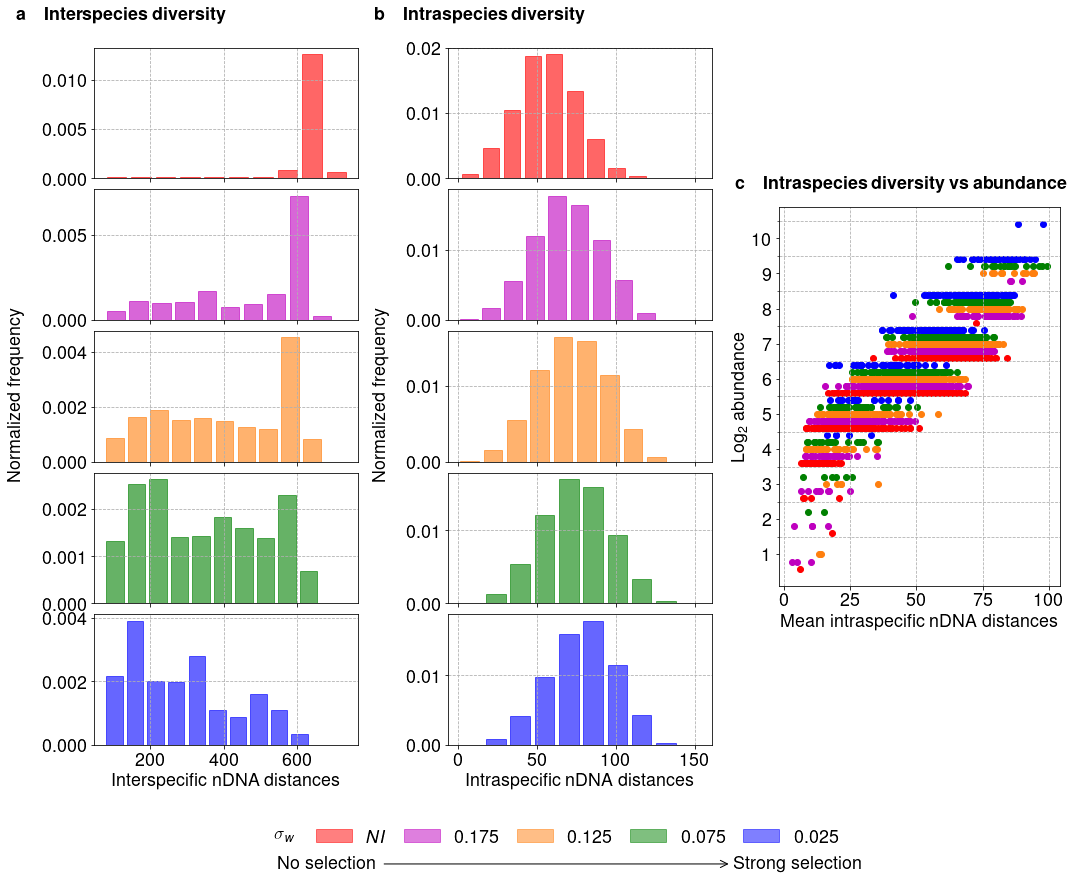

In [25]:
plt.rcParams.update(  {'figure.figsize': (15.6,13)})
fig = plt.figure(constrained_layout=False)
gs1 = fig.add_gridspec(5,1, left=0.07, right=0.305, hspace=0.085) #wspace=0.05
gs2 = fig.add_gridspec(5,1,left=0.385, right=0.62, hspace=0.085)
gs3 = fig.add_gridspec(3,1,left=0.68, right=0.93, height_ratios=[2.5,8,2.5])
gs4 = fig.add_gridspec(1,1,left=0.07, right=0.93,top=0.01, bottom=-0.02)

ax2=[gs1[x] for x in range(len(case))]
ax1=[gs2[x] for x in range(len(case))]

ax2[0] = fig.add_subplot(gs1[0])
ax1[0] = fig.add_subplot(gs2[0])
for c in range(1,len(case)):
    ax2[c] = fig.add_subplot(gs1[c],sharex=ax2[0])
    ax1[c] = fig.add_subplot(gs2[c],sharex=ax1[0]) 
ax3 = fig.add_subplot(gs3[1])
    
box=[]
for c in range(len(case)): 
    ax1[c].hist(dintra_all[c],color=colorlist[c],histtype='barstacked', label=labels2[c], alpha=0.6,rwidth=0.8,edgecolor = colorlist[c],density=True)
    ax2[c].hist(dinter_all[c],color=colorlist[c],histtype='barstacked',label=labels2[c], alpha=0.6,rwidth=0.8,edgecolor = colorlist[c],density=True)
    ax1[c].grid(linestyle='--')
    ax2[c].grid(linestyle='--')
    box.append(mpatches.Patch(color=colorlist[c],alpha=0.5,edgecolor = colorlist[c],label=labels3[c]))
    if (c < (len(case)-1)):
        plt.setp(ax1[c].get_xticklabels(), visible=False)
        plt.setp(ax2[c].get_xticklabels(), visible=False)
    
xplot=np.linspace(0,xind-1,xind)
minor_ticks=xplot[1:]
major_ticks=[xplot[jj]+0.5 for jj in range(xind-1)]
for c in range(len(case)):
    for jj in range(xind-1):
        for ii in range(len(bins_intra[c][jj+1])):
            ax3.scatter(bins_intra[c][jj+1][ii],major_ticks[jj]-0.4+c*0.2,color=colorlist[c])
            ax3.set_ylabel('Log$_2$ abundance')
            ax3.set_xlabel('Mean intraspecific nDNA distances')
            ax3.set_yticks(major_ticks)
            ax3.set_yticks(minor_ticks, minor=True)
            ax3.set_yticklabels(['{:,}'.format(int(x)) for x in minor_ticks])
            ax3.grid(which='major', axis='y',alpha=0)
            ax3.grid(which='minor', axis='y',linestyle='--')
            ax3.grid(which='major', axis='x',linestyle='--')
    
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
fig.text(0, 0.9, r"$\bf{a \quad Interspecies \: diversity}$ ")
fig.text(0.32, 0.9, r"$\bf{b \quad Intraspecies \: diversity}$ ")
fig.text(0.64, 0.72, r"$\bf{c \quad Intraspecies \: diversity \: vs \: abundance}$ ")
ax1[c].set_xlabel('Intraspecific nDNA distances')
ax2[c].set_xlabel('Interspecific nDNA distances')
legend=fig.legend(handles=box, loc="lower center", bbox_to_anchor=(0.5, 0),ncol=5, frameon=False,columnspacing=1)#,title=r'$\sigma_w$'

ax = fig.add_subplot(gs4[0])
ax.axis('off')
an1 = ax.annotate("No selection", xy=(0.19, 0.6), va="center", ha="left")
an2 = ax.annotate("Strong selection", xy=(0.298, 0.6), xytext=(0.794, 0.6), va="center", ha="right",arrowprops=dict(arrowstyle="<-"))

fig.text(0.23, 0.0245, r"$\sigma_w$ ")
fig.text(0, 0.5, 'Normalized frequency', ha='center', va='center', rotation='vertical')
fig.text(0.325, 0.5, 'Normalized frequency', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(top=0.87)
# fig.savefig('./Figuras/Fig5.pdf',transparent=True,bbox_inches='tight')
plt.show()